In [16]:
import tensorflow
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D,Activation,MaxPooling2D,Dense,Flatten,Dropout
from keras import backend as k
import numpy as np
import os

In [17]:
#from PIL import Image
img_w,img_h=32,32
train='C:/Users/sindh/OneDrive/Desktop/Mens/training'
test='C:/Users/sindh/OneDrive/Desktop/Mens/testing'

batch_size=30
epochs=20

if k.image_data_format()=='channels_first':
    input_shape=(3,img_w,img_h)
else:
    input_shape=(img_w,img_h,3)

model=Sequential()

model.add(Conv2D(32,(3,3),input_shape=input_shape))          
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))          
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
activation_8 (Activation)    (None, 13, 13, 64)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 4, 4, 64)         

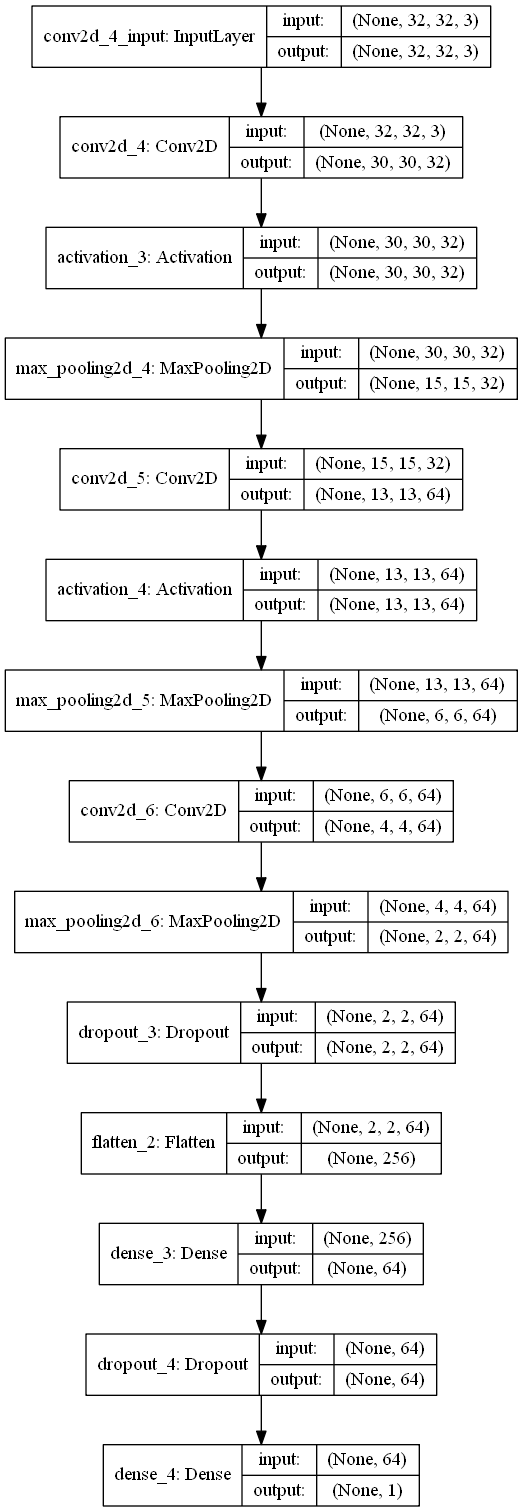

In [7]:
keras.utils.plot_model(model,show_shapes=True)

In [18]:
from keras.preprocessing.image import ImageDataGenerator

train_gen=ImageDataGenerator(rescale=1./255,
                            zoom_range=0.2
                            ,horizontal_flip=True)

test_gen=ImageDataGenerator(rescale=1./255)

train_generator=train_gen.flow_from_directory(train,target_size=(img_w,img_h),
                                             batch_size=batch_size
                                             ,class_mode='binary',shuffle=False)
test_generator=test_gen.flow_from_directory(test,target_size=(img_w,img_h),
                                             batch_size=batch_size
                                             ,class_mode='binary',shuffle=False)

Found 577 images belonging to 2 classes.
Found 57 images belonging to 2 classes.


In [24]:
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

chechpoint=ModelCheckpoint(r'C:/Users/sindh/OneDrive/Desktop/Mens/Mens_shirts.h5',
                          monitor='val_loss',mode='min',
                          save_best_only=True,verbose=1)

earlystoping=EarlyStopping(monitor='val_loss',min_delta=0,
                          patience=3,verbose=1,
                          restore_best_weights=True)

reduce=ReduceLROnPlateau(monitor='val_loss',min_delta=0.01,
                          patience=4,verbose=1,mode ='auto',
                         factor=0.2)

callbacks=[chechpoint,earlystoping,reduce]

model.compile(loss='binary_crossentropy',
             optimizer=Adam(learning_rate=0.001),
             metrics=['accuracy'])

nbtrainsmpls=577
nbtestsmpls=57
epochs=20


hist=model.fit_generator(train_generator,
                         steps_per_epoch=nbtrainsmpls//batch_size,
                         callbacks=callbacks,epochs=epochs,
                         validation_data=test_generator,
                         validation_steps=nbtestsmpls//batch_size
                        )



Epoch 1/20
19/19 [==============================] - 3s 155ms/step - loss: 0.7128 - accuracy: 0.4113 - val_loss: 0.6859 - val_accuracy: 0.9667

Epoch 00001: val_loss improved from inf to 0.68594, saving model to C:/Users/sindh/OneDrive/Desktop/Mens/Mens_shirts.h5
Epoch 2/20
19/19 [==============================] - 3s 146ms/step - loss: 0.7033 - accuracy: 0.3857 - val_loss: 0.6991 - val_accuracy: 0.0741

Epoch 00002: val_loss did not improve from 0.68594
Epoch 3/20
19/19 [==============================] - 3s 160ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6668 - val_accuracy: 0.9667

Epoch 00003: val_loss improved from 0.68594 to 0.66683, saving model to C:/Users/sindh/OneDrive/Desktop/Mens/Mens_shirts.h5
Epoch 4/20
19/19 [==============================] - 3s 136ms/step - loss: 0.6959 - accuracy: 0.4924 - val_loss: 0.7109 - val_accuracy: 0.0000e+00

Epoch 00004: val_loss did not improve from 0.66683
Epoch 5/20
19/19 [==============================] - 3s 167ms/step - loss: 0.69

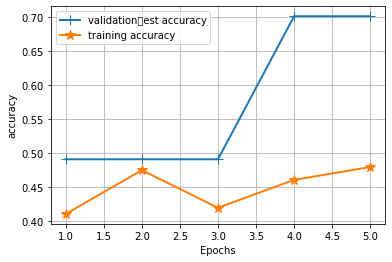

In [39]:
hist_m=hist.history

acc_values=hist_m['accuracy']
val_acc_values=hist_m['val_accuracy']
epochs=range(1,len(acc_values)+1)

line1=plt.plot(epochs,val_acc_values,label='validation\test accuracy')
line2=plt.plot(epochs,acc_values,label='training accuracy')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10)
plt.setp(line2,linewidth=2.0,marker='*',markersize=10)
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [33]:
from keras.optimizers import Nadam

batch_size=25
model1=Sequential()

model1.add(Conv2D(32,(3,3),input_shape=input_shape))          
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Conv2D(64,(3,3)))          
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Conv2D(64,(3,3),activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.5))

model1.add(Flatten())
model1.add(Dense(64,activation='relu'))

model1.add(Dropout(0.5))
model1.add(Dense(1,activation='sigmoid'))

print(model1.summary())


chechpoint=ModelCheckpoint(r'C:/Users/sindh/OneDrive/Desktop/Mens/Mens_nadam_shirts.h5',
                          monitor='val_loss',mode='min',
                          save_best_only=True,verbose=1)

earlystoping=EarlyStopping(monitor='val_loss',min_delta=0,
                          patience=3,verbose=1,
                          restore_best_weights=True)

reduce=ReduceLROnPlateau(monitor='val_loss',min_delta=0,
                          patience=4,verbose=1,mode='auto',
                         factor=0.2)

callbacks=[chechpoint,earlystoping,reduce]

model1.compile(loss='binary_crossentropy',
             optimizer=Nadam(learning_rate=0.002),
             metrics=['accuracy'])

nbtrainsmpls=577
nbtestsmpls=57
epochs=20


hist1=model1.fit_generator(train_generator,
                         steps_per_epoch=nbtrainsmpls//batch_size,
                         callbacks=callbacks,epochs=epochs,
                         validation_data=test_generator,
                         validation_steps=nbtestsmpls//batch_size
                        )


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
activation_25 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
activation_26 (Activation)   (None, 13, 13, 64)        0         
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 4, 4, 64)        

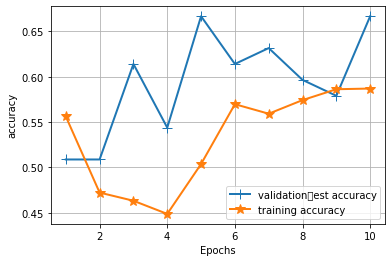

In [40]:
hist1_m=hist1.history

acc_values=hist1_m['accuracy']
val_acc_values=hist1_m['val_accuracy']
epochs=range(1,len(acc_values)+1)

line1=plt.plot(epochs,val_acc_values,label='validation\test accuracy')
line2=plt.plot(epochs,acc_values,label='training accuracy')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10)
plt.setp(line2,linewidth=2.0,marker='*',markersize=10)
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [37]:
from keras.optimizers import RMSprop

batch_size=30
model2=Sequential()

model2.add(Conv2D(32,(3,3),input_shape=input_shape))          
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(64,(3,3)))          
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(64,(3,3),activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.5))

model2.add(Flatten())
model2.add(Dense(64,activation='relu'))

model2.add(Dropout(0.5))
model2.add(Dense(1,activation='sigmoid'))

print(model2.summary())


chechpoint=ModelCheckpoint(r'C:/Users/sindh/OneDrive/Desktop/Mens/Mens_RMSprop_shirts.h5',
                          monitor='val_loss',mode='min',
                          save_best_only=True,verbose=1)

earlystoping=EarlyStopping(monitor='val_loss',min_delta=0,
                          patience=4,verbose=1,
                          restore_best_weights=True)

reduce=ReduceLROnPlateau(monitor='val_loss',min_delta=0.1,
                          patience=4,verbose=1,mode='auto',
                         factor=0.2)

callbacks=[chechpoint,earlystoping,reduce]

model2.compile(loss='binary_crossentropy',
             optimizer=RMSprop(learning_rate=0.0001),
             metrics=['accuracy'])

nbtrainsmpls=577
nbtestsmpls=57
epochs=20


hist2=model2.fit_generator(train_generator,
                         steps_per_epoch=nbtrainsmpls//batch_size,
                         callbacks=callbacks,epochs=epochs,
                         validation_data=test_generator,
                         validation_steps=nbtestsmpls//batch_size
                        )


Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
activation_33 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
activation_34 (Activation)   (None, 13, 13, 64)        0         
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 4, 4, 64)        

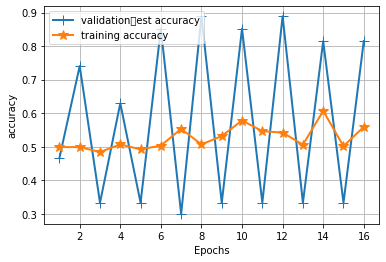

In [41]:
hist2_m=hist2.history

acc_values=hist2_m['accuracy']
val_acc_values=hist2_m['val_accuracy']
epochs=range(1,len(acc_values)+1)

line1=plt.plot(epochs,val_acc_values,label='validation\test accuracy')
line2=plt.plot(epochs,acc_values,label='training accuracy')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10)
plt.setp(line2,linewidth=2.0,marker='*',markersize=10)
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [49]:
from keras.optimizers import SGD

batch_size=25
model3=Sequential()

model3.add(Conv2D(32,(3,3),input_shape=input_shape))          
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Conv2D(64,(3,3)))          
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Conv2D(64,(3,3),activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.5))

model3.add(Flatten())
model3.add(Dense(64,activation='relu'))

model3.add(Dropout(0.5))
model3.add(Dense(1,activation='sigmoid'))

print(model3.summary())


chechpoint=ModelCheckpoint(r'C:/Users/sindh/OneDrive/Desktop/Mens/Mens_SGD_shirts.h5',
                          monitor='val_loss',mode='min',
                          save_best_only=True,verbose=1)

earlystoping=EarlyStopping(monitor='val_loss',min_delta=0,
                          patience=4,verbose=1,
                          restore_best_weights=True)

reduce=ReduceLROnPlateau(monitor='val_loss',min_delta=0.1,
                          patience=4,verbose=1,
                         factor=0.2)

callbacks=[chechpoint,earlystoping,reduce]

model3.compile(loss='binary_crossentropy',
             optimizer=SGD(learning_rate=0.0001,momentum=0.0,nesterov=False),
             metrics=['accuracy'])

nbtrainsmpls=577
nbtestsmpls=57
epochs=20


hist3=model3.fit_generator(train_generator,
                         steps_per_epoch=nbtrainsmpls//batch_size,
                         callbacks=callbacks,epochs=epochs,
                         validation_data=test_generator,
                         validation_steps=nbtestsmpls//batch_size
                        )


Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_73 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
activation_49 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_73 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
activation_50 (Activation)   (None, 13, 13, 64)        0         
_________________________________________________________________
max_pooling2d_74 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 4, 4, 64)        

C:\Users\sindh\.conda\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sindh\.conda\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


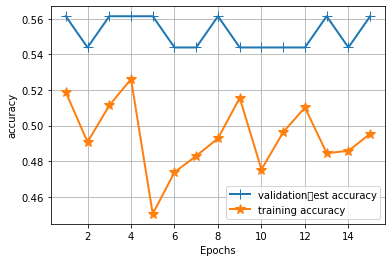

In [50]:
hist3_m=hist3.history

acc_values=hist3_m['accuracy']
val_acc_values=hist3_m['val_accuracy']
epochs=range(1,len(acc_values)+1)

line1=plt.plot(epochs,val_acc_values,label='validation\test accuracy')
line2=plt.plot(epochs,acc_values,label='training accuracy')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10)
plt.setp(line2,linewidth=2.0,marker='*',markersize=10)
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [57]:
from keras.optimizers import SGD

batch_size=30
model4=Sequential()

model4.add(Conv2D(32,(3,3),input_shape=input_shape))          
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2,2)))

model4.add(Conv2D(64,(3,3)))          
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2,2)))

model4.add(Conv2D(64,(3,3),activation='relu'))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Dropout(0.5))

model4.add(Flatten())
model4.add(Dense(64,activation='relu'))

model4.add(Dropout(0.5))
model4.add(Dense(1,activation='sigmoid'))


chechpoint=ModelCheckpoint(r'C:/Users/sindh/OneDrive/Desktop/Mens/Mens_NAG_shirts.h5',
                          monitor='val_loss',mode='min',
                          save_best_only=True,verbose=1)

earlystoping=EarlyStopping(monitor='val_loss',min_delta=0,
                          patience=4,verbose=1,
                          restore_best_weights=True)

reduce=ReduceLROnPlateau(monitor='val_loss',min_delta=0.1,
                          patience=4,verbose=1,
                         factor=0.2)

callbacks=[chechpoint,earlystoping,reduce]

model4.compile(loss='binary_crossentropy',
             optimizer=SGD(learning_rate=0.0002,momentum=0.0,nesterov=True),
             metrics=['accuracy'])

nbtrainsmpls=577
nbtestsmpls=57
epochs=20


hist4=model4.fit_generator(train_generator,
                         steps_per_epoch=nbtrainsmpls//batch_size,
                         callbacks=callbacks,epochs=epochs,
                         validation_data=test_generator,
                         validation_steps=nbtestsmpls//batch_size
                        )


Epoch 1/20
19/19 [==============================] - 3s 158ms/step - loss: 0.7005 - accuracy: 0.4881 - val_loss: 0.6863 - val_accuracy: 0.7000

Epoch 00001: val_loss improved from inf to 0.68626, saving model to C:/Users/sindh/OneDrive/Desktop/Mens/Mens_NAG_shirts.h5
Epoch 2/20
19/19 [==============================] - 3s 156ms/step - loss: 0.6956 - accuracy: 0.5137 - val_loss: 0.7057 - val_accuracy: 0.2222

Epoch 00002: val_loss did not improve from 0.68626
Epoch 3/20
19/19 [==============================] - 3s 171ms/step - loss: 0.6980 - accuracy: 0.5046 - val_loss: 0.6863 - val_accuracy: 0.7000

Epoch 00003: val_loss did not improve from 0.68626
Epoch 4/20
19/19 [==============================] - 3s 146ms/step - loss: 0.6976 - accuracy: 0.4753 - val_loss: 0.7041 - val_accuracy: 0.2963

Epoch 00004: val_loss did not improve from 0.68626
Epoch 5/20
19/19 [==============================] - 3s 132ms/step - loss: 0.6946 - accuracy: 0.5484 - val_loss: 0.6857 - val_accuracy: 0.7000

Epoch 00